### Import relevant Libraries

In [1]:
# import libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import GradientBoostingRegressor 

from sklearn.preprocessing import StandardScaler

from sklearn import metrics

import seaborn as sns
sns.set()

In [2]:
# load the preprocessed CSV data
data_preprocessed = pd.read_csv('Abalone_preprocessed.csv')
data_preprocessed.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,1,0


### Regression
We can approach in predicting the dataset by using regression models. A regression model takes input values given for training and tries to use them to predict trends using the data.

The models we will be using are:
- Generalized Linear Regression
- Random Forest Regression
- Decision Tree Regression
- Gradient Boost Regression

#### Declare the inputs and the targets

In [3]:
# The target(s) (dependent variable)
targets = data_preprocessed['Age']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['Age'],axis=1)

#### Scale the data

In [4]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [5]:
inputs_scaled = scaler.transform(inputs)

#### Train Test Split

In [6]:
# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

#### Create the Regression
##### Linear Regression

In [7]:
# Create a linear regression object
lrreg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
lrreg.fit(x_train,y_train)

LinearRegression()

In [8]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
lr_y_hat = lrreg.predict(x_train)

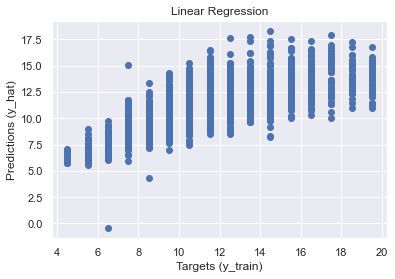

In [9]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train,lr_y_hat)
plt.title('Linear Regression') 

plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_hat)')

plt.xlim()
plt.ylim()
plt.show()

##### Random Forest Regression

In [10]:
# Create a random forest regression object
rfreg = RandomForestRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators= 100 )
# Fit the regression with the scaled TRAIN inputs and targets
rfreg.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10)

In [11]:
# Let's check the outputs of the regression
rf_y_hat = rfreg.predict(x_train)

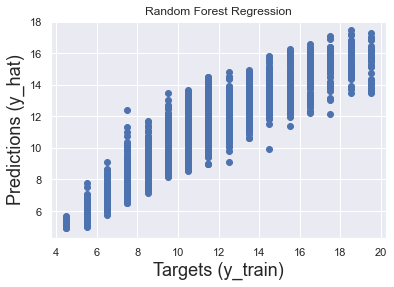

In [12]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, rf_y_hat)
plt.title('Random Forest Regression') 

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.xlim()
plt.ylim()
plt.show()

##### Decison Tree Regression

In [13]:
# Create a decisiontree regression object
dtreg = DecisionTreeRegressor(max_depth = 10)
# Fit the regression with the scaled TRAIN inputs and targets
dtreg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [14]:
# Let's check the outputs of the regression
dt_y_hat = dtreg.predict(x_train)

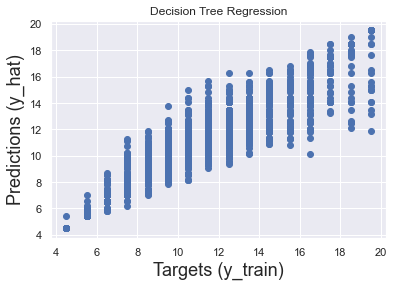

In [15]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, dt_y_hat)
plt.title('Decision Tree Regression') 

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.xlim()
plt.ylim()
plt.show()

##### Gradient Boosting Regression

In [16]:
# Create a decisiontree regression object
gbreg = GradientBoostingRegressor(max_depth = 10)
# Fit the regression with the scaled TRAIN inputs and targets
gbreg.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=10)

In [17]:
# Let's check the outputs of the regression
gb_y_hat = gbreg.predict(x_train)

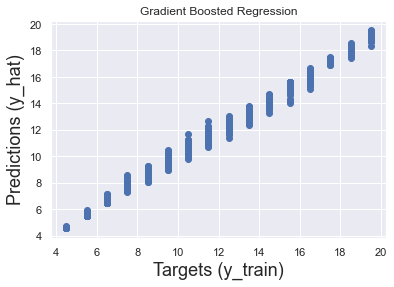

In [18]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train,gb_y_hat)
plt.title('Gradient Boosted Regression') 

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

plt.xlim()
plt.ylim()
plt.show()

### Results

In [19]:
# Find the R-squared of the model
print("Linear Regression R2 score: \t\t", round(metrics.r2_score(y_train, lr_y_hat), 2))
print('Linear Regression RMSE score: \t\t', np.sqrt(metrics.mean_squared_error(y_train, lr_y_hat)))

print("\nRandom Forest Regression R2 score: \t", round(metrics.r2_score(y_train, rf_y_hat), 2))
print('Random Forest Regression RMSE score: \t', np.sqrt(metrics.mean_squared_error(y_train, rf_y_hat)))

print("\nDecision Tree Regression R2 score: \t", round(metrics.r2_score(y_train, dt_y_hat), 2))
print('Decison Tree Regression RMSE score: \t', np.sqrt(metrics.mean_squared_error(y_train, dt_y_hat)))

print("\nGradient Boosted Regression R2 score: \t", round(metrics.r2_score(y_train, gb_y_hat), 2))
print('Gradient Boosted Regression RMSE score: ', np.sqrt(metrics.mean_squared_error(y_train, gb_y_hat)))

Linear Regression R2 score: 		 0.53
Linear Regression RMSE score: 		 1.8817195951090817

Random Forest Regression R2 score: 	 0.78
Random Forest Regression RMSE score: 	 1.2817691953546055

Decision Tree Regression R2 score: 	 0.81
Decison Tree Regression RMSE score: 	 1.2131597014100493

Gradient Boosted Regression R2 score: 	 0.99
Gradient Boosted Regression RMSE score:  0.28115181017303537


### Testing

In [20]:
y_hat_test = gbreg.predict(x_test)

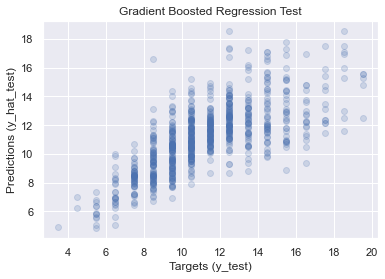

In [21]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.title('Gradient Boosted Regression Test')
plt.xlabel('Targets (y_test)')
plt.ylabel('Predictions (y_hat_test)')
plt.xlim()
plt.ylim()
plt.show()

In [22]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,102264.804585
1,6574.008745
2,4837.782702
3,92911.054187
4,19081.317280


In [23]:
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,102264.804585,1.982759e+06
1,6574.008745,1.335973e+04
2,4837.782702,1.335973e+04
3,92911.054187,7.294164e+05
4,19081.317280,3.631550e+04
...,...,...
794,111023.818324,1.335973e+04
795,25248.743822,9.871577e+04
796,101033.310655,3.631550e+04
797,64851.974441,4.914769e+03


In [24]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,102264.804585,1.982759e+06,1.880494e+06,94.842298
1,6574.008745,1.335973e+04,6.785718e+03,50.792342
2,4837.782702,1.335973e+04,8.521944e+03,63.788311
3,92911.054187,7.294164e+05,6.365053e+05,87.262275
4,19081.317280,3.631550e+04,1.723419e+04,47.456827
...,...,...,...,...
794,111023.818324,1.335973e+04,-9.766409e+04,731.033596
795,25248.743822,9.871577e+04,7.346703e+04,74.422786
796,101033.310655,3.631550e+04,-6.471781e+04,178.209864
797,64851.974441,4.914769e+03,-5.993721e+04,1219.532547


In [25]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,7.990000e+02,7.990000e+02,7.990000e+02,799.000000
mean,1.286662e+06,4.462540e+06,3.175879e+06,835.313664
std,7.270861e+06,2.617797e+07,2.579930e+07,11848.588361
min,1.235785e+02,3.311545e+01,-1.158115e+08,0.322303
25%,1.464383e+04,1.335973e+04,-5.388624e+04,45.556971
50%,6.810875e+04,3.631550e+04,-6.233884e+02,88.020168
75%,2.511753e+05,2.683373e+05,7.258172e+04,196.903843
max,1.171450e+08,2.942676e+08,2.939996e+08,330926.833752


In [26]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
697,4898.93,4914.77,15.84,0.32
140,270461.68,268337.29,-2124.39,0.79
188,99524.03,98715.77,-808.26,0.82
108,13487.24,13359.73,-127.51,0.95
534,39355245.95,39824784.40,469538.45,1.18
448,673.26,665.14,-8.12,1.22
695,13526.22,13359.73,-166.49,1.25
216,2029226.82,1982759.26,-46467.55,2.34
648,35404.36,36315.50,911.14,2.51
419,648.45,665.14,16.69,2.51


In [27]:
print("\nGradient Boosted Regression R2 score: \t", round(metrics.r2_score(y_test, y_hat_test), 2))
print('Gradient Boosted Regression RMSE score: ', np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))


Gradient Boosted Regression R2 score: 	 0.51
Gradient Boosted Regression RMSE score:  1.9524485374827931
